In [1]:
import random
import math 
import copy 
import time
import matplotlib.pyplot as plt
import random
from scipy import stats
import math
import numpy as np

In [2]:
def sortByX(points):
  return sorted(points, key = lambda xy: xy[0])

In [3]:
def sortByY(points):
  return sorted(points, key = lambda xy: xy[1])

In [4]:
def distance(pt0, pt1):
  return math.sqrt((pt0[0]-pt1[0]) ** 2 + (pt0[1]-pt1[1])**2)

In [5]:
def closest_pair_brute(arr,n):
    smallest_dist = float('inf')
    for i in range(len(arr)-1):
        for j in range(i+1, len(arr)):
            dist = distance(arr[i],arr[j])
            if dist < smallest_dist:
                smallest_dist = dist
            
    return smallest_dist


In [6]:
def get_min(P, Q, d):
    midPoint = P[len(P) // 2][0]
    rangeDist = [Q[i] for i in range(len(Q)) if midPoint - d <= Q[i][0] and Q[i][0] <= midPoint + d]
    minDist = math.inf

    for i in range(len(rangeDist)):
        for j in range(i + 1, min(i + 15, len(rangeDist))):
            dNew = distance(rangeDist[i], rangeDist[j])
            if dNew < minDist:
                minDist = dNew 
    return minDist

def closest_pair_DC(P,lenP):
    if lenP <2:
        return math.inf
    if lenP == 2:
        return distance(P[0],P[1])
   
    Pn = sortByX(P)
    Qn = sortByY(P)
    midPoint = lenP // 2
    Qx = Pn[:midPoint]  # Get left part of array with x sorted
    Rx = Pn[midPoint:]  # Get right part of array with x sorted
    dLeft = closest_pair_DC(Qx,len(Qx))  # Left side min
    dRight = closest_pair_DC(Rx,len(Rx))  # Right side min
    
    if dLeft > dRight:
        minDistAll = dRight
    else:
        minDistAll = dLeft
    d = get_min(Pn, Qn, minDistAll)
    minDistPlane = min(d, minDistAll)
    if minDistPlane == d:
        return minDistPlane
    else:
        return minDistPlane
    

 Modified approach.
Experiment 1 switch to the naive algorithm when the number of points becomes small 
Experiment 2: limit the number of points that are sorted to only those within minD (see notes) in the x-direction
Experiment 3: eliminate the sort by y by returning the points sorted by y from the base case, then maintain this sorted-by-y property of the points by implementing the merge step of merge sort on the way back from recursion.


In [7]:
def CP(points, n):
    P = sortByX(points)
    Q = sortByY(points)
    return closest_pair_2D(P, Q, n)

def closest_pair_2D(P, Q, n):
    if len(P) <= 3 and len(Q) <= 3:
        return closest_pair_brute(P, n)

    mid = len(P) // 2
    left_dist_x = P[:mid]
    right_dist_x = P[mid // 2:]

    median = left_dist_x[mid - 1]

    left_dist_y, right_dist_y = [], []
    for coord in Q:
        if coord[0] <= median[0]:
            left_dist_y.append(coord)
        else:
            right_dist_y.append(coord)

    dist_l = closest_pair_2D(left_dist_x, left_dist_y, n)
    dist_r = closest_pair_2D(right_dist_x, right_dist_y, n)
    dist_s = split_points(P, Q, min(dist_l, dist_r))
    closest_distance = min(dist_l, dist_r, dist_s)
    return closest_distance

def split_points(P, Q, d):
    median = P[len(P) // 2 - 1]
    arr = [coord for coord in Q if median[0] - d <= coord[0] <= median[0] + d]
    closest_dist = d
    for i in range(len(arr) - 1):
        for j in range(i + 1, min(8, len(arr) - i)):
            dist = distance(arr[i], arr[j])
            if dist < closest_dist:
                closest_dist = dist

    return closest_dist


Function closest_pair_brute time = 0.000532 n ^ 1.886
Function closest_pair_DC time = 0.008434 n ^ 1.084
Function CP time = 0.006180 n ^ 1.293


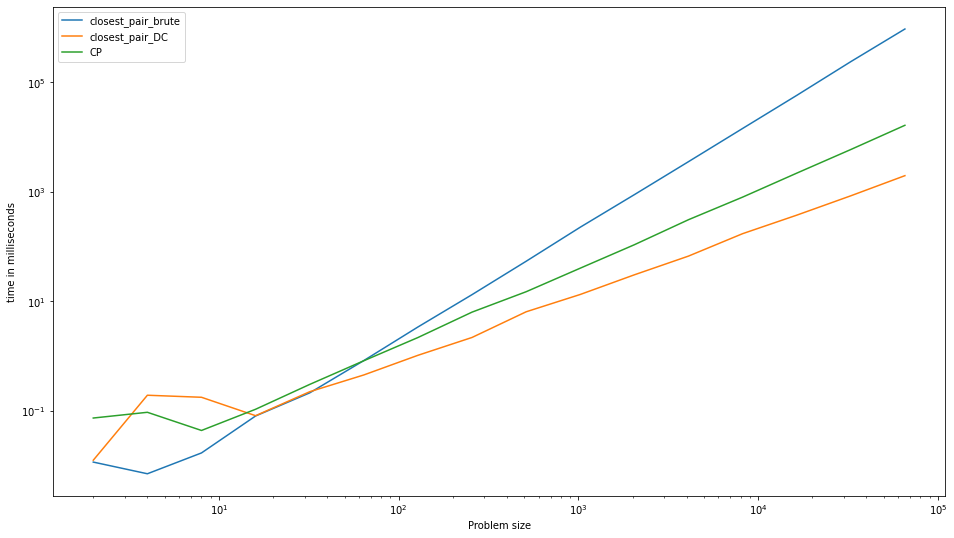

In [ ]:
problemSizes = [2**i for i in range(1, 17)]
#print(problemSizes)
problemList = [(i, (generateRandomPoints(i), i)) for i in problemSizes]
#print(problemList)
functionList=[closest_pair_brute,closest_pair_DC,CP]
avgtimeCompareFunctions(problemList, functionList, init = None, fit = 'polynomial')

From the graph, bruteforce algo works faster than DC till problem size 2^5 so we can change the implementation to use bruteforce till problem size 32 and then move to DC algo.
Overall Complexity:
BruteForce = O(n^2)
DC and extended DC work almost O(n).


In [10]:
# Test2 to check if all of the three methods yield same output.
for i in range(5):
  print("Test ",i)
  P = generateRandomPoints(10)
  print("Points ",P)
  print("closest pair brute ",closest_pair_brute(P,n))
  print("closest pair DC ",closest_pair_DC(P,n))
  print("closest pair DC modified ",CP(P,n))

Test  0
Points  [(-42.65266276529995, -38.909073432671605), (-90.37229575162672, 33.957389060351574), (55.89967178601992, 91.80994341779532), (30.525151886203844, -4.026003024562314), (-72.78028349822496, -84.43245952981545), (-96.01829316889861, -18.037247399212887), (-35.09837256963495, 83.73699961382036), (-35.84951553731696, 94.36575213864026), (-66.95211969015949, 81.59903999264981), (-98.32292071927272, 22.938601250067506)]
closest pair brute  10.655261422966758
closest pair DC  10.655261422966758
closest pair DC modified  10.655261422966758
Test  1
Points  [(0.3277664423886506, -53.28340500375324), (50.499417343558775, -70.77308882763376), (-1.8608468413778212, 72.35836404508183), (9.977233061651745, 45.655959022322946), (-46.580075396651786, 59.08391502209648), (-24.658396711283515, -25.19398329028941), (66.00115924993335, -79.77811231427899), (37.06009121085046, 15.379794952627762), (25.540129663196495, 59.75540766727548), (-47.74336904325489, -39.69950965217814)]
closest pair

In [ ]:
# Test2 to check if all of the three methods yield same output.
for i in range(100):
  print("Test ",i)
  P = generateRandomPoints(10)
  n= len(P)
  print("Points ",P)
  print("closest pair brute ",closest_pair_brute(P,n))
  print("closest pair DC ",closest_pair_DC(P,n))
  print("closest pair DC modified ",CP(P,n))

Test  0
Points  [(-24.902982101446895, 68.47877590047301), (19.22196661108022, 51.788901252222786), (67.79908304355175, 74.3957928390115), (26.890501518385506, -91.50428086643707), (63.197832782824634, -70.17058443531148), (44.66555351810203, 51.445406473921224), (-56.82081994852477, 18.93518777754643), (-17.234521387339925, -44.25148215705739), (-10.50619960124719, 63.2424727070275), (-92.18012893601566, -64.14391600092134)]
closest pair brute  15.319471841148575
closest pair DC  15.319471841148575
closest pair DC modified  15.319471841148575
Test  1
Points  [(-43.4514571363936, -44.168506283384666), (-39.196904317381055, -86.63335219366178), (-6.354370875508479, -39.73459673316424), (73.68730374483926, -73.57275093052536), (-17.936260889287837, -87.84922804060524), (13.294920995177776, 83.43856845309395), (42.000892897607315, -69.16355193565084), (-1.2272790733482708, -9.19864635645456), (-92.40544002475562, 1.378106702940613), (89.14000885917574, 72.26852593637335)]
closest pair bru

In [9]:
#Test1 to check if all the algorithms give the same output.
# Expected answer: 1.41421356
P = [(2, 3), (12, 30), (40, 50), (5, 1),(12, 10), (3, 4)] 
n = len(P)
Q = [(447, 323), (781, 905), (40, 510), (952, 246), (409, 123), (913, 668), (203, 705), (504, 546), (752, 56), (557, 410), (181, 171), (849, 280), (97, 56)]
m = len(Q)
print("closest pair brute ",closest_pair_brute(P,n))
print("closest pair DC ",closest_pair_DC(P,n))
print("closest pair DC Modified",CP(P,n))
print("\n")
print("closest pair brute ",closest_pair_brute(Q,m))
print("closest pair DC ",closest_pair_DC(Q,m))
print("closest pair DC Modified",CP(Q,m))


closest pair brute  1.4142135623730951
closest pair DC  1.4142135623730951
closest pair DC Modified 1.4142135623730951


closest pair brute  108.4665847162157
closest pair DC  108.4665847162157
closest pair DC Modified 108.4665847162157


In [8]:
def generateRandomPoints(n):
  return [(random.uniform(-100.0, +100), random.uniform(-100.0, +100) ) for i in range(0,n)]


In [ ]:
def avgtimeCompareFunctions(problemList, functionList, init = None, fit = 'exponential'):
    plt.xlabel("Problem size")
    plt.yscale('log')
    if fit == 'polynomial':
      plt.xscale('log')
    plt.ylabel("time in milliseconds")
    plt.rcParams["figure.figsize"] = [16,9]
    values = [size for (size, args) in problemList]
    for function in functionList:
      functionName = str(function).split(" ")[1]
      timeLine = []
      for (size, args) in problemList:
        start_time = time.time()
        function(*args) #use the * to unpack the tuple into arguments to the function
        elapsed = (time.time() - start_time)*1000.0
        timeLine.append(elapsed)
      ##Generating the plot between time taken by each function call with n as variable and n
      plt.plot(values, timeLine, label = functionName)
      # fit these timing studies to a curve
      if fit == 'exponential': #fit a straight line to n and log time
        slope, intercept, _, _, _ = stats.linregress([values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f %.3f ^ n" % (functionName, np.exp(intercept), np.exp(slope)))
      elif fit == 'polynomial': # fit a straight line to log n and log time
        slope, intercept, _, _, _ = stats.linregress([np.log(v) for v in values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f n ^ %.3f" % (functionName, np.exp(intercept), slope))
    plt.legend(loc='upper left')
    plt.show()
